# Base-Line Models


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

cols = ['fLength','fWidth','fSize','fConc','fConc1',
        'fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

df = pd.read_csv('/Users/venkatchandan/Desktop/ML_Projects/CosmicClassifier/Dataset/magic04.data',names = cols)
X = df.iloc[:, :-1]
y = df["class"]  

In [ ]:
df['class'].value_counts()
# Data is very Imbalanced

class
g    12332
h     6688
Name: count, dtype: int64

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        
    random_state=42,      
    stratify=y            # keep same g:h ratio in train and test ( Important when Data is Imbalanced.)
)

In [6]:
models = {
    "GaussianNB": GaussianNB(),
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(),                         # default: RBF kernel, C=1
    "RandomForest": RandomForestClassifier(random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} ")
    print(classification_report(y_test, y_pred))


GaussianNB 
              precision    recall  f1-score   support

           g       0.73      0.91      0.81      3700
           h       0.70      0.38      0.49      2006

    accuracy                           0.72      5706
   macro avg       0.71      0.65      0.65      5706
weighted avg       0.72      0.72      0.70      5706

LogReg 
              precision    recall  f1-score   support

           g       0.81      0.90      0.85      3700
           h       0.76      0.60      0.67      2006

    accuracy                           0.79      5706
   macro avg       0.79      0.75      0.76      5706
weighted avg       0.79      0.79      0.79      5706

SVM 
              precision    recall  f1-score   support

           g       0.81      0.96      0.88      3700
           h       0.89      0.59      0.71      2006

    accuracy                           0.83      5706
   macro avg       0.85      0.78      0.80      5706
weighted avg       0.84      0.83      0.82      

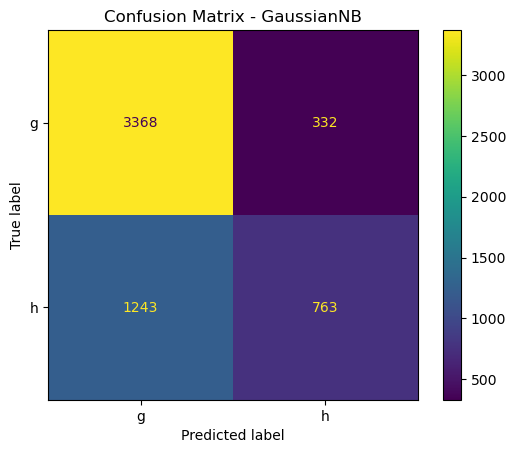

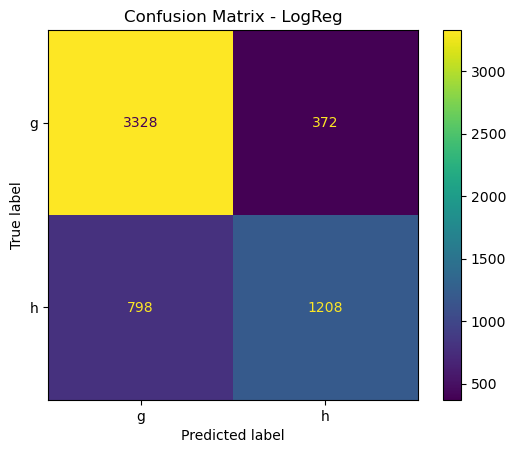

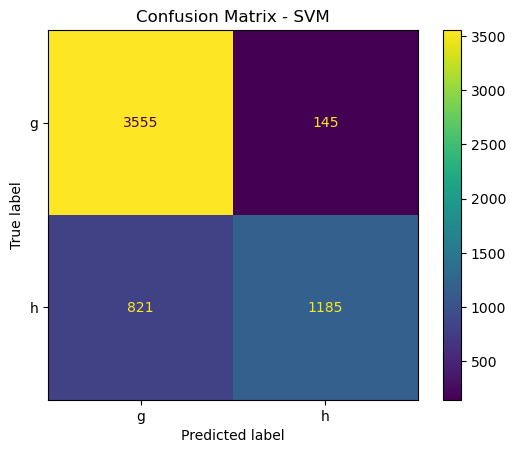

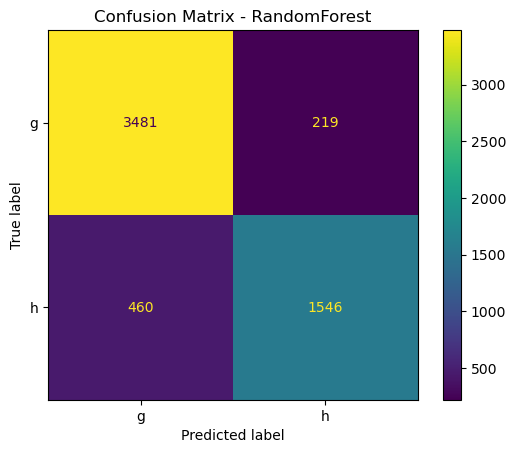

In [ ]:
import seaborn as sns 

from sklearn.metrics import ConfusionMatrixDisplay

for name, clf in models.items():
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=['g','h'])
    disp = ConfusionMatrixDisplay(cm, display_labels=['g','h'])
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()
